In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/Shareddrives/CSCI 461/Raw Data/NYTD'
%ls

Mounted at /content/drive/
/content/drive/Shareddrives/CSCI 461/Raw Data/NYTD
'202v2 NYTD Outcomes 2011 Cohort All Waves'/
'228 NYTD Outcomes 2014 Cohort - Complete'/
'242 NYTD Outcomes 2017 Cohort Waves 1 & 2'/
'256 NYTD Outcomes 2020 Cohort Wave 1'/
'259 NYTD Services 2020'/
'Additional data documentation.gdoc'
'NYTD Services File Codebook.pdf'


In [ ]:
# python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Cohort Feature Missingness #

In [ ]:
# viewing shape and % feature missingness
miss=pd.DataFrame()
cohort=pd.DataFrame()
for d in os.listdir('Econ587_P1_NYTD_Data'):
  if 'Cohort' in d:
    for f in os.listdir('Econ587_P1_NYTD_Data/{}/Data/Stata/'.format(d)):
      if f =="Outcomes_C11W3_Stata12.dta":
          continue
      print("Reading {} file from {}".format(f, d))
      df=pd.read_stata('Econ587_P1_NYTD_Data/{}/Data/Stata/{}'.format(d,f))
      print("Dataframe size: {}".format(str(df.shape)))
      cohort=cohort.append(df)
      print(len(df.recnumbr.unique()))
      miss = pd.concat([miss, pd.DataFrame(df.isnull().sum()/df.shape[0], columns=[f])],axis=1)
miss.to_csv("../../processed/cohort_miss.csv")

Reading Outcomes_C11W3v2.dta file from 202v2 NYTD Outcomes 2011 Cohort All Waves
Dataframe size: (58729, 50)
30009
Reading Cohort20W1.dta file from 256 NYTD Outcomes 2020 Cohort Wave 1
Dataframe size: (21430, 51)
21430
Reading Cohort14W3.dta file from 228 NYTD Outcomes 2014 Cohort - Complete
Dataframe size: (52569, 51)
23780
Reading Cohort17W2.dta file from 242 NYTD Outcomes 2017 Cohort Waves 1 & 2
Dataframe size: (40700, 51)
24478


In [ ]:
print("Dataframe shape: {}".format(cohort.shape))
print("Number of individuals based on number of occurances")
print(cohort.recnumbr.value_counts().value_counts())

Dataframe shape: (173428, 58)
Number of individuals based on number of occurances
1    51071
3    25109
2    23511
4        2
Name: recnumbr, dtype: int64


In [ ]:
# % feature missingness across cohorts
# 0 = GOOD; 1 = BAD
# NaN -- not included as a feature
miss

,Outcomes_C11W3v2.dta,Cohort20W1.dta,Cohort14W3.dta,Cohort17W2.dta
wave,0.000000,0.000000,0.000000,0.000000
stfips,0.000000,0.000000,0.000000,NaN
st,0.000000,0.000000,0.000000,0.000000
recnumbr,0.000000,0.000000,0.000000,0.000000
repdate,0.000000,0.000000,0.000000,0.000000
dob,0.000000,0.000000,0.000000,0.000000
sex,0.001277,0.000000,0.000000,0.000000
amiakn,0.000000,0.000000,0.000000,0.000000
asian,0.000000,0.000000,0.000000,0.000000
blkafram,0.000000,0.000000,0.000000,0.000000


# Process Services #

In [ ]:
# reading in services
service = pd.read_stata('259 NYTD Services 2020/Data/Stata/Services2020.dta')
service.columns

Index(['fy', 'stfips', 'st', 'repdate', 'recnumbr', 'dob', 'sex', 'amiakn',
       'asian', 'blkafram', 'hawaiipi', 'white', 'raceunkn', 'racedcln',
       'hisorgin', 'fcstatsv', 'lclfipssv', 'tribesv', 'delinqntsv',
       'edlevlsv', 'specedsv', 'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv',
       'emplytrsv', 'budgetsv', 'housedsv', 'hlthedsv', 'famsuppsv',
       'mentorsv', 'silsv', 'rmbrdfasv', 'educfinasv', 'othrfinasv', 'stfcid',
       'race', 'raceethn', 'agemp', 'cohort'],
      dtype='object')

In [ ]:
service.shape

(1698819, 40)

In [ ]:
# defining a function to take union of samples using dropna()
def first_(g):
    non_na = g.dropna()
    return non_na.iat[0] if len(non_na) > 0 else pd.np.nan

In [ ]:
# take union of services - TAKES > 60 MIN
year=[2011, 2014, 2017, 2020]
for i in year:
  service_filter = service[service['fy'].astype(int) <= i]
  test=pd.DataFrame(service_filter["recnumbr"]).join(service_filter.iloc[:,20:-5])
  test.replace("No", np.nan, inplace=True)
  test=test.groupby('recnumbr').agg(first_).reset_index()
  test.replace(np.nan, "No", inplace=True)
  test.to_csv("../../recnumbr_services_{}.csv".format(str(i)), index=False)


# Adding Services to Outcomes + Cleaning Data #

In [ ]:
#combining the waves
l=[]

cohort = pd.read_stata('256 NYTD Outcomes 2020 Cohort Wave 1/Data/Stata/Cohort20W1.dta')
s=pd.read_csv('../../processed/recnumbr_services_2020.csv')
cohort["fy"]=2020
combined=pd.merge(cohort, s, on='recnumbr', how='inner')
print("Reading in Cohort 2020")
print("Outcomes: {} total records; {} features".format(cohort.shape[0], cohort.shape[1]))
print("Services: {} total records; {} features".format(s.shape[0], s.shape[1]))
print("Combined: {} total records; {} features".format(combined.shape[0], combined.shape[1]))
l.append(combined)

cohort = pd.read_stata('242 NYTD Outcomes 2017 Cohort Waves 1 & 2/Data/Stata/Cohort17W2.dta')
s=pd.read_csv('../../processed/recnumbr_services_2017.csv')
cohort["fy"]=2017
combined=pd.merge(cohort, s, on='recnumbr', how='inner')
print("Reading in Cohort 2017")
print("Outcomes: {} total records; {} features".format(cohort.shape[0], cohort.shape[1]))
print("Services: {} total records; {} features".format(s.shape[0], s.shape[1]))
print("Combined: {} total records; {} features".format(combined.shape[0], combined.shape[1]))
l.append(combined)

cohort = pd.read_stata('202v2 NYTD Outcomes 2011 Cohort All Waves/Data/Stata/Outcomes_C11W3v2.dta')
cohort["fy"]=2011
s=pd.read_csv('../../processed/recnumbr_services_2011.csv')
combined=pd.merge(cohort, s, on='recnumbr', how='inner')
print("Reading in Cohort 2011")
print("Outcomes: {} total records; {} features".format(cohort.shape[0], cohort.shape[1]))
print("Services: {} total records; {} features".format(s.shape[0], s.shape[1]))
print("Combined: {} total records; {} features".format(combined.shape[0], combined.shape[1]))
l.append(combined)

cohort = pd.read_stata('228 NYTD Outcomes 2014 Cohort - Complete/Data/Stata/Cohort14W3.dta')
cohort["fy"]=2014
s=pd.read_csv('../../processed/recnumbr_services_2014.csv')
combined=pd.merge(cohort, s, on='recnumbr', how='inner')
print("Reading in Cohort 2020")
print("Outcomes: {} total records; {} features".format(cohort.shape[0], cohort.shape[1]))
print("Services: {} total records; {} features".format(s.shape[0], s.shape[1]))
print("Combined: {} total records; {} features".format(combined.shape[0], combined.shape[1]))
l.append(combined)

Reading in Cohort 2020
Outcomes: 21430 total records; 52 features
Services: 488944 total records; 16 features
Combined: 14670 total records; 67 features
Reading in Cohort 2020
Outcomes: 40700 total records; 52 features
Services: 369466 total records; 16 features
Combined: 28337 total records; 67 features
Reading in Cohort 2020
Outcomes: 58729 total records; 51 features
Services: 115577 total records; 16 features
Combined: 33920 total records; 66 features
Reading in Cohort 2020
Outcomes: 52569 total records; 52 features
Services: 242912 total records; 16 features
Combined: 35330 total records; 67 features


In [ ]:
# combining waves and removing duplicates
df=pd.concat(l,ignore_index=True)
df=df.sort_values(by=['fy']).reset_index()

# uncomment if not pruning for 17 year olds
# print("Number of records BEFORE removing duplicates individuals: {}".format(df.shape[0]))
# df=df.drop_duplicates(subset=['recnumbr'], keep='last')
# print("Number of records AFTER removing duplicates individuals: {}".format(df.shape[0]))

In [ ]:
# dropping columns
# drop high missingness 
print('Number of features BEFORE pruning for duplicated information and high missingness {}'.format(df.shape[1]))
df=df.drop(columns=['fy11cohort', 'elig19', 'elig21', 'samplestate', 'insample',
       'responded', 'race', 'raceethn', 'stfcid', 'fy20cohort', 'fips5',
       'fy14cohort', '_highedcert', 'ln_highedcert', 'ln_homeless', 'state',
       'fy17cohort', 'socsecrty', 'pubhousas'])

# drop features with duplicate/unnecessary information
df=df.drop(columns=['index', 'wave','outcmdte', 'stfips'])

print('Number of features AFTER pruning for duplicated information and high missingness {}'.format(df.shape[1]))


Number of features BEFORE pruning for duplicated information and high missingness 75
Number of features AFTER pruning for duplicated information and high missingness 52


In [ ]:
# correcting and converting report date
df.loc[df["repdate"].str.strip()=='20', "repdate"]='201701'
df.loc[(df["repdate"].str.strip()=='') & (df["fy"]==2014), "repdate"]='201401'
df.loc[(df["repdate"].str.strip()=='') & (df["fy"]==2011), "repdate"]='201101'

df["repdate"]=pd.to_datetime(df["repdate"], format='%Y%m')

In [ ]:
# Adding age as a feature
df["dob"] = pd.to_datetime(df["dob"])
df["age"]=round((((df["repdate"]-df["dob"] ).dt.days)/365))

In [ ]:
# dropping other date indicators
print('Number of features BEFORE dropping duplicate age information {}'.format(df.shape[1]))
df = df.drop(columns=['dob', 'repdate', 'fy'])
print('Number of features AFTER dropping duplicate age information {}'.format(df.shape[1]))


Number of features BEFORE dropping duplicate age information 53
Number of features AFTER dropping duplicate age information 50


In [ ]:
# clean identified race information
print('Number of individuals/features BEFORE filtering for empty race information and declined race {}'.format(df.shape))
df = df[df['raceunkn']!="Unknown"]
df = df[df['racedcln']=="no"]
df=df.drop(columns=['racedcln'])
df.loc[df['hisorgin']=="unknown", 'hisorgin'] = "Unknown"
df.loc[df['hisorgin'].isna() == True, 'hisorgin'] = "blank"
df = df[df['hisorgin']!="blank"]
df = df[df['hisorgin']!="Blank"]
print('Number of individuals/features AFTER filtering for empty race information and declined race {}'.format(df.shape))

Number of individuals/features BEFORE filtering for empty race information and declined race (112257, 50)
Number of individuals/features AFTER filtering for empty race information and declined race (106092, 49)


In [ ]:
# removing individual with high missingness - ONE PERSON REMOVED
df = df[df['educaid'].isna() == False]

In [ ]:
# filling missingness with blank
df.replace(np.nan, "blank", inplace=True)

In [ ]:
# removing individuals with unknown coding
print('Number of individuals BEFORE filtering for unknown coding {}'.format(df.shape[0]))
df = df[df['highedcert'] != 78] 
df = df[df['outcmrpt'] != 78] 
df = df[df['pubfinas'] != 78] 
df = df[df['homeless'] != 78] 
df = df[df['othrhlthin'] != 78] 
print('Number of individuals AFTER filtering for unknown coding {}'.format(df.shape[0]))

Number of individuals BEFORE filtering for unknown coding 106089
Number of individuals AFTER filtering for unknown coding 105990


In [ ]:
# recording missingness in target features
print("{} Individual w Missing Education Information".format(df[ (df['highedcert'] == "blank") | (df['highedcert'] == "declined")].shape[0])) 
print("{} Individual w Missing Homelessness Information".format(df[ (df['homeless'] == "blank") | (df['homeless'] == "declined")].shape[0])) 
print("{} Individual w Missing Substance Abuse Information".format(df[ (df['subabuse'] == "blank") | (df['subabuse'] == "declined")].shape[0])) 
print("{} Individual w Missing Incaceration Information".format(df[ (df['incarc'] == "blank") | (df['incarc'] == "declined")].shape[0])) 


36773 Individual w Missing Education Information
36777 Individual w Missing Homelessness Information
36744 Individual w Missing Substance Abuse Information
36693 Individual w Missing Incaceration Information


In [ ]:
# education, substance abuse, and incaceration status and in baseline population
print('Number of individuals BEFORE filtering for unknown target information {}'.format(df.shape[0]))
df = df[ (df['highedcert'] != "blank") & (df['highedcert'] != "declined")] 
df = df[ (df['homeless'] != "blank") & (df['homeless'] != "declined")] 
df = df[ (df['subabuse'] != "blank") & (df['subabuse'] != "declined")] 
df = df[ (df['incarc'] != "blank") & (df['incarc'] != "declined")] 
print('Number of individuals AFTER filtering for unknown target information {}'.format(df.shape[0]))

Number of individuals BEFORE filtering for unknown target information 105990
Number of individuals AFTER filtering for unknown target information 66231


In [ ]:
# Selecting individuals who fully participated in the study
print('Number of individuals/features BEFORE filtering for participation {}; '.format(df.shape))
df=df[df['outcmrpt']=="participated"]
df=df.drop(columns=['outcmrpt'])
print('Number of individuals/features AFTER filtering for participation {}'.format(df.shape))

Number of individuals/features BEFORE filtering for participation (66231, 49); 
Number of individuals/features AFTER filtering for participation (66177, 48)


In [ ]:
# Selecting for 17 year olds
print('Number of individuals/features BEFORE filtering for 17 year olds {}; '.format(df.shape))
df=df[df['age']==17]
print('Number of individuals/features AFTER filtering for 17 year olds {}; '.format(df.shape))


Number of individuals/features BEFORE filtering for 17 year olds (66177, 48); 
Number of individuals/features AFTER filtering for 17 year olds (45364, 48); 


In [ ]:
# re-ordering columns for organizational purposes 
cols = [
    'recnumbr',
    'age',
    'st',
    'sex',
    'outcmfcs',
    'amiakn',
    'asian',
    'blkafram',
    'hawaiipi',
    'white',
    'raceunkn',
    'hisorgin',
    'emplysklls',
    'educaid',
    'pubfinas',
    'pubfoodas',
    'othrfinas',
    'currenroll',
    'cnctadult',
    'children',
    'marriage',
    'medicaid',
    'othrhlthin',
    'medicalin',
    'mentlhlthin',
    'prescripin',
    'baseline',
    'specedsv',
    'ilnasv',
    'acsuppsv',
    'psedsuppsv',
    'careersv',
    'emplytrsv',
    'budgetsv',
    'housedsv',
    'hlthedsv',
    'famsuppsv',
    'mentorsv',
    'silsv',
    'rmbrdfasv',
    'educfinasv',
    'othrfinasv',
    'highedcert',
    'homeless',
    'subabuse',
    'incarc',
    'currfte',
    'currpte']
df = df[cols]

In [ ]:
# list of columsn before one-hot encoding
df.columns

Index(['recnumbr', 'age', 'st', 'sex', 'outcmfcs', 'amiakn', 'asian',
       'blkafram', 'hawaiipi', 'white', 'raceunkn', 'hisorgin', 'emplysklls',
       'educaid', 'pubfinas', 'pubfoodas', 'othrfinas', 'currenroll',
       'cnctadult', 'children', 'marriage', 'medicaid', 'othrhlthin',
       'medicalin', 'mentlhlthin', 'prescripin', 'baseline', 'specedsv',
       'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv', 'emplytrsv', 'budgetsv',
       'housedsv', 'hlthedsv', 'famsuppsv', 'mentorsv', 'silsv', 'rmbrdfasv',
       'educfinasv', 'othrfinasv', 'highedcert', 'homeless', 'subabuse',
       'incarc', 'currfte', 'currpte'],
      dtype='object')

In [ ]:
# simplifying labeling for removal
df=df.replace("blank", "declined")
df=df.replace("Blank", "declined")

In [ ]:
# onehot encoding 
print( "Number of features BEFORE OHE: {}".format(df.shape[1]))
cat= pd.get_dummies(df.iloc[:,2: ])
print( "Number of features AFTER OHE and BEFORE pruning for duplicate declined information: {}".format(cat.shape[1]))
d=defaultdict(lambda: 0)
for i in cat.columns:
  if i.split('_')[-1] == "declined" or i.split('_')[-1] == "Unknown" :
    print(i)
    cat.drop(columns=[i], inplace=True)
    # get missingness 
    # if i == "white_Unknown" or i =="raceunkn_Unknown" or i == "subabuse_declined":
    #   continue
    # print(cat[i].value_counts()[1]/cat.shape[0])
  else:
    d[i.split('_')[0]] += 1
print( "Number of features AFTER OHE and AFTER pruning for duplicate declined information: {}".format(cat.shape[1]))
for k in d.keys():
  print("{} maps to {} OHE feature(s)".format(k, d[k]))


Number of features BEFORE OHE: 48
Number of features AFTER OHE and BEFORE pruning for duplicate declined information: 199
amiakn_Unknown
asian_Unknown
blkafram_Unknown
hawaiipi_Unknown
white_Unknown
raceunkn_Unknown
hisorgin_Unknown
hisorgin_declined
emplysklls_declined
educaid_declined
pubfinas_declined
pubfoodas_declined
othrfinas_declined
currenroll_declined
cnctadult_declined
children_declined
marriage_declined
medicaid_declined
othrhlthin_declined
medicalin_declined
mentlhlthin_declined
prescripin_declined
specedsv_declined
ilnasv_declined
acsuppsv_declined
psedsuppsv_declined
careersv_declined
emplytrsv_declined
budgetsv_declined
housedsv_declined
hlthedsv_declined
famsuppsv_declined
mentorsv_declined
silsv_declined
rmbrdfasv_declined
educfinasv_declined
othrfinasv_declined
subabuse_declined
incarc_declined
currfte_declined
currpte_declined
Number of features AFTER OHE and AFTER pruning for duplicate declined information: 158
st maps to 52 OHE feature(s)
sex maps to 2 OHE feature

In [ ]:
# final columns list
for c in cat.columns:
  print(c)

st_AK
st_AL
st_AR
st_AZ
st_CA
st_CO
st_CT
st_DC
st_DE
st_FL
st_GA
st_HI
st_IA
st_ID
st_IL
st_IN
st_KS
st_KY
st_LA
st_MA
st_MD
st_ME
st_MI
st_MN
st_MO
st_MS
st_MT
st_NC
st_ND
st_NE
st_NH
st_NJ
st_NM
st_NV
st_NY
st_OH
st_OK
st_OR
st_PA
st_PR
st_RI
st_SC
st_SD
st_TN
st_TX
st_UT
st_VA
st_VT
st_WA
st_WI
st_WV
st_WY
sex_male
sex_female
outcmfcs_no
outcmfcs_yes
amiakn_no
amiakn_yes
asian_no
asian_yes
blkafram_no
blkafram_yes
hawaiipi_no
hawaiipi_yes
white_no
white_yes
raceunkn_no
raceunkn_yes
hisorgin_no
hisorgin_yes
emplysklls_no
emplysklls_yes
educaid_no
educaid_yes
pubfinas_no
pubfinas_not applicable
pubfinas_yes
pubfoodas_no
pubfoodas_yes
pubfoodas_not applicable
othrfinas_no
othrfinas_yes
currenroll_no
currenroll_yes
cnctadult_no
cnctadult_yes
children_no
children_yes
marriage_no
marriage_not applicable
marriage_yes
medicaid_no
medicaid_yes
othrhlthin_no
othrhlthin_not applicable
othrhlthin_yes
medicalin_no
medicalin_yes
medicalin_not applicable
mentlhlthin_no
mentlhlthin_yes
mentlhlthin

In [ ]:
final=pd.concat([df.iloc[:,:2],cat], axis=1)
final.to_csv('../../processed/combined_ohe_17.csv', index=False)
print(final.shape)
final.head()

(45364, 160)


,recnumbr,age,st_AK,st_AL,st_AR,st_AZ,st_CA,st_CO,st_CT,st_DC,...,homeless_no,homeless_yes,subabuse_no,subabuse_yes,incarc_no,incarc_yes,currfte_no,currfte_yes,currpte_no,currpte_yes
0,000180733692,17.0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,00BaEOYIaD3S,17.0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
15,00BdZKHi537S,17.0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
18,00Be9JBpc0C0,17.0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
21,00BErykc501S,17.0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0


some thoughts 

age   outcmfcs
16.0  no            739
      yes           531
17.0  no           2844
      yes         23810
18.0  no              6
      yes           159
19.0  no            350
      yes           201
21.0  no           3471
      yes           843
22.0  no              4
dtype: int64


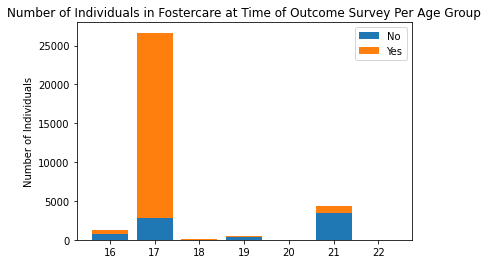

In [ ]:
# we want to balance the age groups and ratio of in/out of fostercare
num_fc = df[["age", "outcmfcs"]].value_counts()
num_fc=num_fc.sort_index()
print(num_fc)
num_fc[22.0, "yes"] =0
fig, ax = plt.subplots()

ax.bar(num_fc[:,"no"].keys(), num_fc[:,"no"].values, label="No")
ax.bar(num_fc[:,"yes"].keys(), num_fc[:,"yes"].values,label='Yes', bottom = num_fc[:,"no"].values)

ax.set_ylabel('Number of Individuals')
ax.set_title('Number of Individuals in Fostercare at Time of Outcome Survey Per Age Group')
ax.legend()

plt.show()